chameleon
{'r_r': 0.7001209189842805, 'r_r_n': 579, 'r_w': 0.2998790810157195, 'r_w_n': 248, 'w_r': 0.24413793103448275, 'w_r_n': 354, 'w_w': 0.7558620689655172, 'w_w_n': 1096}
{'r_r': 0.6312968917470525, 'r_r_n': 589, 'r_w': 0.3687031082529475, 'r_w_n': 344, 'w_r': 0.16294642857142858, 'w_r_n': 219, 'w_w': 0.8370535714285714, 'w_w_n': 1125}
{'r_r': 0.8824257425742574, 'r_r_n': 713, 'r_w': 0.11757425742574257, 'r_w_n': 95, 'w_r': 0.08441116405718176, 'w_r_n': 124, 'w_w': 0.9155888359428183, 'w_w_n': 1345}
{'r_r': 0.6917562724014337, 'r_r_n': 579, 'r_w': 0.30824372759856633, 'r_w_n': 258, 'w_r': 0.20694444444444443, 'w_r_n': 298, 'w_w': 0.7930555555555556, 'w_w_n': 1142}
{'r_r': 0.9714937286202965, 'r_r_n': 852, 'r_w': 0.02850627137970352, 'r_w_n': 25, 'w_r': 0.0035714285714285713, 'w_r_n': 5, 'w_w': 0.9964285714285714, 'w_w_n': 1395}
[0.25934067 0.26593408 0.21098903 0.24175826 0.24835166 0.25054947]
[0.3631971892841458, 0.40974967061923584, 0.35485287659200704, 0.3675889328063241, 0.3

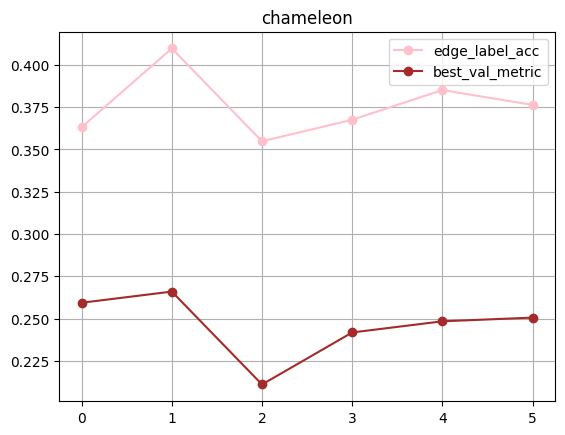

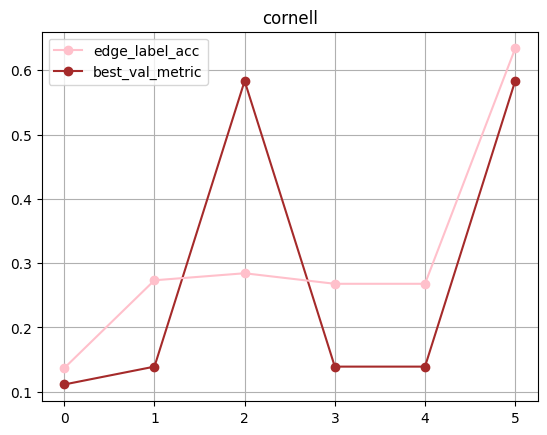

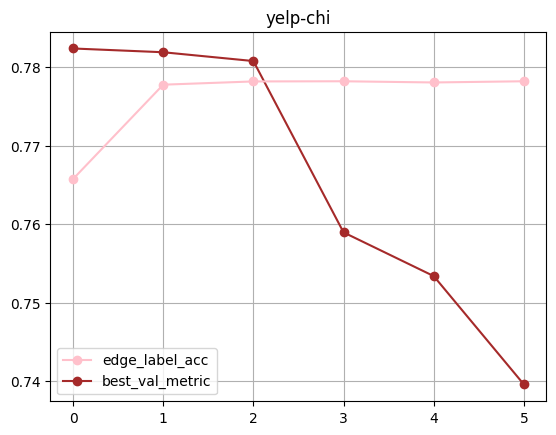

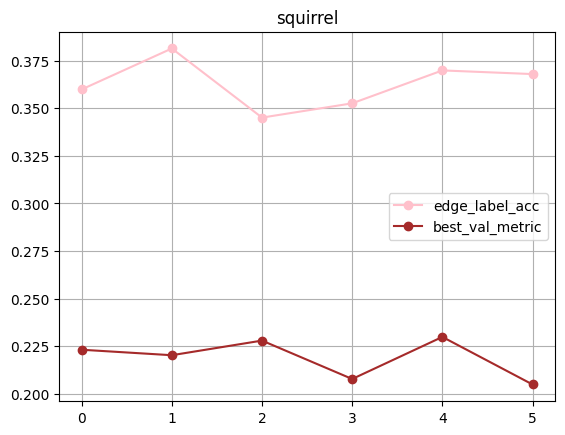

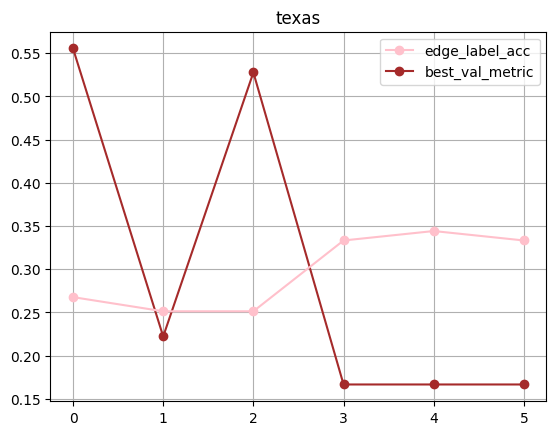

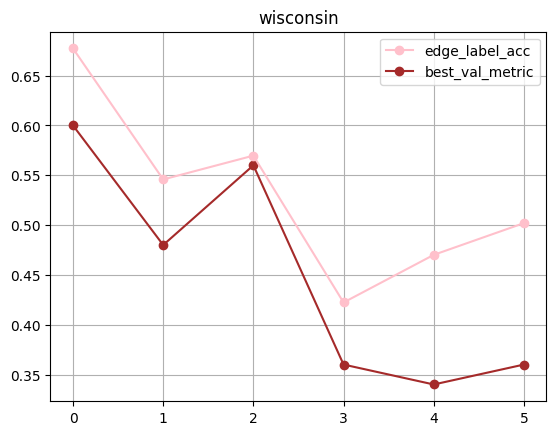

In [3]:
# 3.17 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
datasets = ['chameleon', 'cornell', 'yelp-chi', 'squirrel', 'texas', 'wisconsin']


for dataset_name in datasets:
    y = np.load(f'utils_data/ourModel_{dataset_name}/y.npy')
    edge_label_list = np.load(f'utils_data/ourModel_{dataset_name}/edge_label_list.npy')
    best_val_metric = np.load(f'utils_data/ourModel_{dataset_name}/best_val_metric_list.npy')
    r_r_list = []
    w_r_list = []
    r_w_n_list = []
    w_r_n_list = []
    print(dataset_name)
    for i in range(len(edge_label_list)-1):
        res = cal_change_ratio(y, edge_label_list[i], edge_label_list[i+1])
        r_w_n_list.append(res['r_w_n'])
        w_r_n_list.append(res['w_r_n'])
        print(res)        
    print(best_val_metric)
    edge_label_acc = [np.mean(edge_label==y) for edge_label in edge_label_list]
    print(edge_label_acc)
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    lns1 = ax.plot(best_val_metric, '-o', label='best_val_metric', color='brown')
    lns2 = ax.plot(edge_label_acc, '-o', label='edge_label_acc', color='pink')
    
    # ax2 = ax.twinx()
    # lns3 = ax2.plot(np.arange(len(w_r_n_list))+0.5, np.array(w_r_n_list)-np.array(r_w_n_list), '-o', label='delta')
    # lns4 = ax2.plot(np.arange(len(w_r_list))+0.5, w_r_list, '-o', label='w_r')
    
    lns = lns2 + lns1 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()

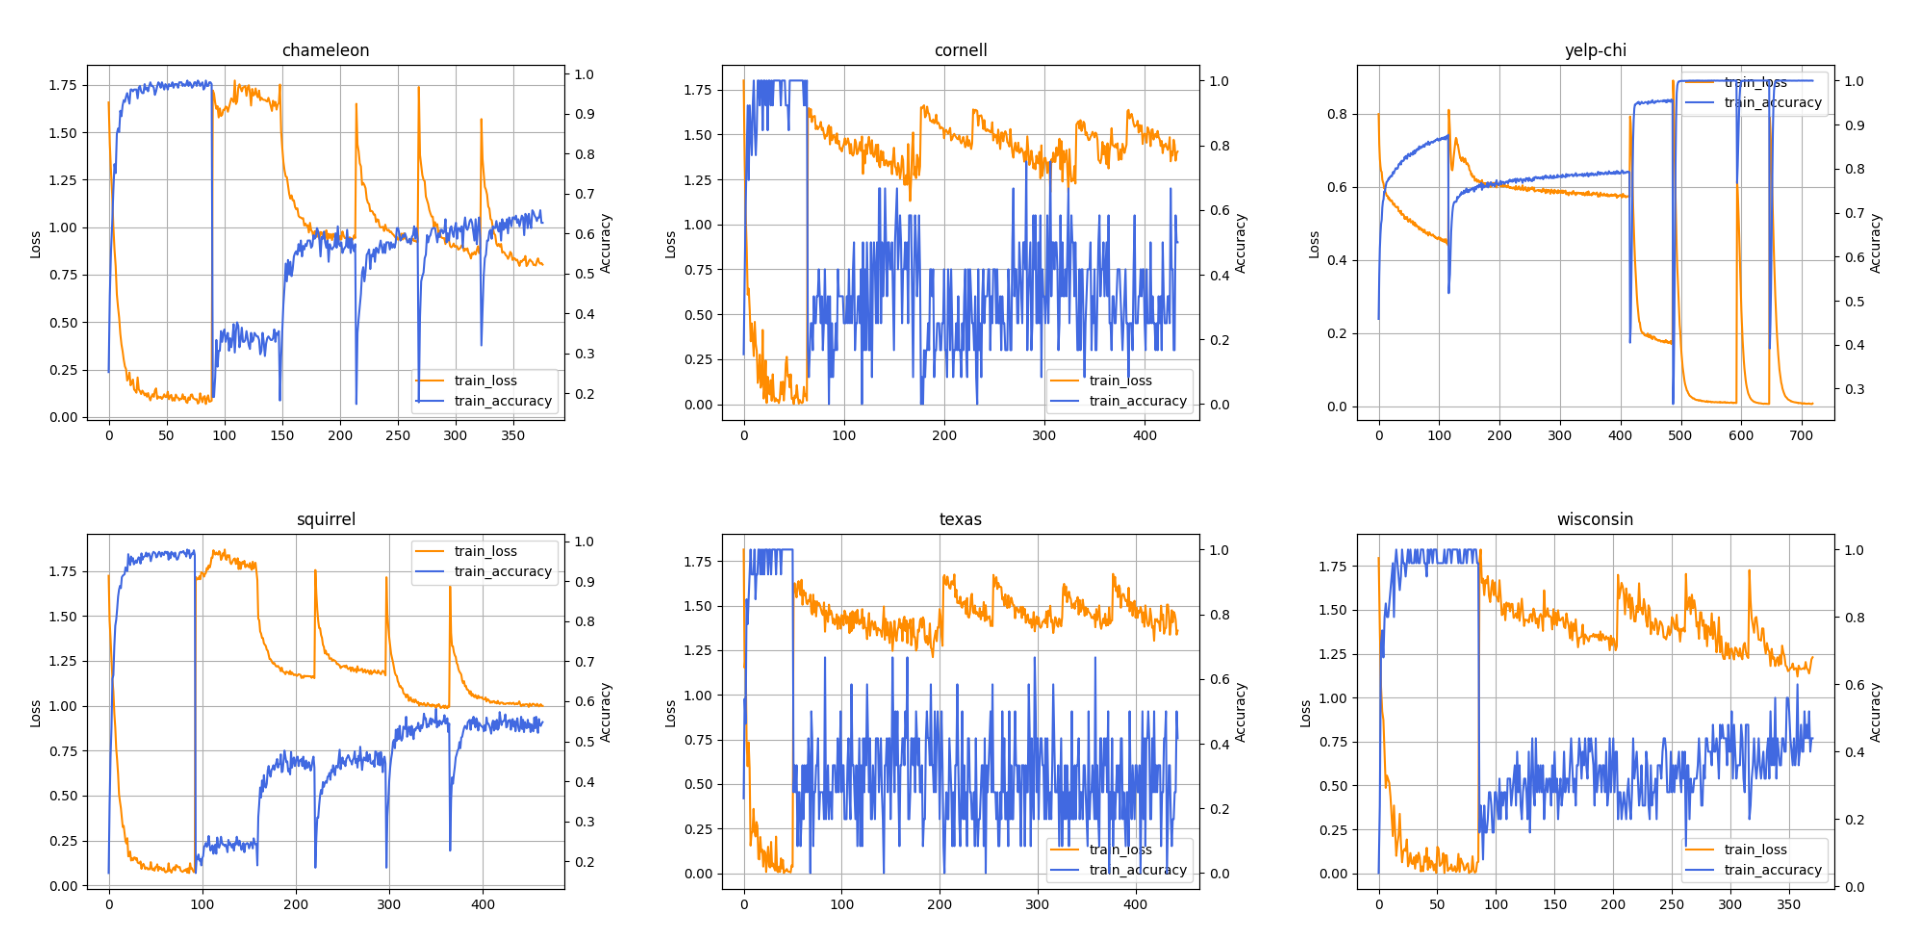

imgs/train_Composite_2.png


<Figure size 640x480 with 0 Axes>

In [2]:
# 3.17 数据分析
import numpy as np
from utils import cal_change_ratio
import matplotlib.pyplot as plt 
import os
import matplotlib.image as mpimg

datasets = ['chameleon', 'cornell', 'yelp-chi', 'squirrel', 'texas', 'wisconsin']

tail = 2

for dataset_name in datasets:
    train_loss_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/loss.npy')[:,0]
    train_accuracy_list = np.load(f'utils_data/ourModel_{dataset_name}_{tail}/metric.npy')
    
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    ax.set_ylabel('Loss')
    lns1 = ax.plot(train_loss_list, label='train_loss', color='darkorange')
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(train_accuracy_list, label='train_accuracy', color='royalblue')
    ax2.set_ylabel('Accuracy')
    
    lns = lns1 + lns2 
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    ax.set_title(dataset_name)
    
    ax.grid()
    
    plt.savefig(f'imgs/train_{dataset_name}_{tail}.png')
    plt.close()


image_list = [f'train_{dataset}_{tail}.png' for dataset in datasets]

img_sample = plt.imread(os.path.join('imgs', image_list[0]))
(max_height, max_width, _) = img_sample.shape

images = [mpimg.imread(os.path.join('imgs', path)) for path in image_list]
plt.figure(figsize=(max_width * 3 / 100, max_height * 2 / 100))

for i, image in enumerate(images):
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.axis('off') 
    
plt.tight_layout()

plt.show()
plt.savefig(f'imgs/train_Composite_{tail}.png')
print(f'imgs/train_Composite_{tail}.png')



In [65]:
import numpy as np
import matplotlib.pyplot as plt 

easy_vote_record_1 = np.load('utils_data/easy_vote_record_1.npy')
hard_vote_record_1 = np.load('utils_data/hard_vote_record_1.npy')
easy_vote_record_2 = np.load('utils_data/easy_vote_record_2.npy')
hard_vote_record_2 = np.load('utils_data/hard_vote_record_2.npy')
easy_vote_record_3 = np.load('utils_data/easy_vote_record_3.npy')
hard_vote_record_3 = np.load('utils_data/hard_vote_record_3.npy')

bar = 3

hard_indices_1 = np.where((hard_vote_record_1 - easy_vote_record_1)>bar)[0]
easy_indices_1 = np.where((hard_vote_record_1 - easy_vote_record_1)<=bar)[0]
hard_indices_2 = np.where((hard_vote_record_2 - easy_vote_record_2)>bar)[0]
easy_indices_2 = np.where((hard_vote_record_2 - easy_vote_record_2)<=bar)[0]
hard_indices_3 = np.where((hard_vote_record_3 - easy_vote_record_3)>bar)[0]
easy_indices_3 = np.where((hard_vote_record_3 - easy_vote_record_3)<=bar)[0]

In [61]:
np.median(hard_vote_record_1 - easy_vote_record_1)

3.0

In [66]:
print(len(hard_indices_1))
print(len(easy_indices_1))

488
552


In [54]:
np.intersect1d(easy_indices_2, easy_indices_3).shape[0] / easy_indices_2.shape[0]

0.518450184501845

In [ ]:
easy_indices_2

<BarContainer object of 21 artists>

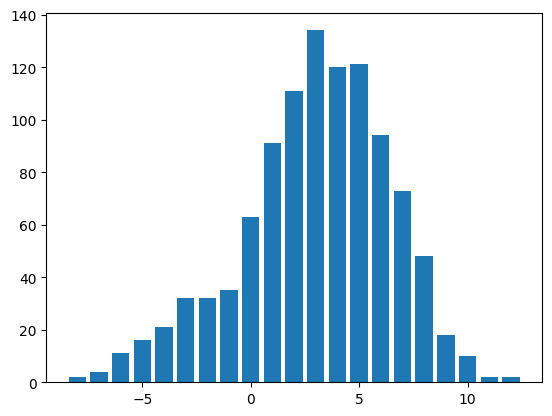

In [43]:
x, y = np.unique(hard_vote_record_1 - easy_vote_record_1, return_counts=True)
plt.bar(x,y)

In [37]:
np.intersect1d(hard_indices_1, hard_indices_2).shape

(374,)

(array([   0,    1,    4,    5,    7,    8,    9,   10,   11,   12,   13,
          15,   17,   18,   19,   21,   22,   24,   26,   27,   28,   29,
          30,   31,   32,   33,   36,   38,   39,   44,   47,   50,   51,
          52,   53,   55,   56,   58,   59,   60,   62,   63,   64,   66,
          70,   72,   75,   76,   79,   80,   82,   83,   84,   85,   86,
          87,   89,   90,   92,   93,   94,   97,   98,  101,  103,  104,
         107,  108,  109,  110,  111,  114,  117,  118,  120,  121,  122,
         125,  126,  129,  130,  133,  138,  139,  141,  143,  144,  146,
         147,  149,  151,  152,  153,  154,  155,  156,  157,  160,  161,
         162,  163,  164,  167,  168,  169,  171,  172,  173,  174,  177,
         178,  179,  182,  184,  185,  186,  187,  188,  189,  192,  195,
         196,  198,  199,  200,  201,  202,  204,  205,  206,  207,  208,
         211,  212,  213,  215,  216,  219,  220,  223,  224,  225,  226,
         227,  231,  232,  233,  234, 

In [26]:
easy_vote_record_1.shape

(1040,)